In [69]:
import h5py
import dxchange
import numpy as np
import torch as tc
import torch.nn.functional as tcf
import tomopy
import matplotlib.pyplot as plt
from scipy.ndimage import zoom

Preview reconstruction

Theta: 0.0 to 3.141592653589793, 1501 in total.
Reconstructing 32 slice groups with 1 master threads...


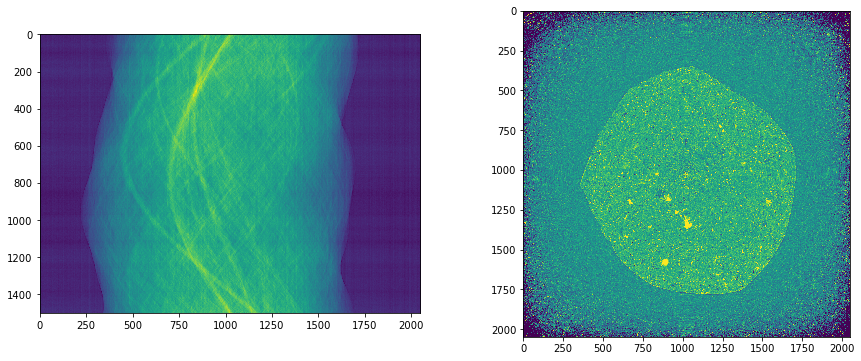

In [43]:
prj, flt, drk, theta = dxchange.read_aps_32id('raw/tomo_00001.h5', sino=(800, 801))
print('Theta: {} to {}, {} in total.'.format(theta[0], theta[-1], len(theta)))
prj = tomopy.normalize(prj, flt, drk)
prj = tomopy.minus_log(prj)
rec = tomopy.recon(prj, theta=theta, center=1024, algorithm='gridrec')
rec_mean = rec.mean()
rec_std = np.std(rec)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].imshow(np.squeeze(prj))
axes[1].imshow(np.squeeze(rec), vmin=rec_mean - 2 * rec_std, vmax=rec_mean + 2 * rec_std)
plt.show()

Full tomography recon

In [65]:
prj, flt, drk, theta = dxchange.read_aps_32id('raw/tomo_00001.h5', sino=(0, 1792))
print('Theta: {} to {}, {} in total.'.format(theta[0], theta[-1], len(theta)))
prj = tomopy.normalize(prj, flt, drk)
prj = tomopy.minus_log(prj)
rec = tomopy.recon(prj, theta=theta, center=1024, algorithm='gridrec')
dxchange.write_tiff_stack(rec, 'tomo_rec/recon', dtype='float32', overwrite=True)

Theta: 0.0 to 3.141592653589793, 1501 in total.
Reconstructing 32 slice groups with 32 master threads...


Reslice tomography reconstruction

In [90]:
slc = dxchange.read_tiff_stack('tomo_rec/recon_00000.tiff', ind=range(0, 1792), slc=[(1024, 1025, 1), (0, 2048, 1)])
slc = np.squeeze(slc)[:, ::-1]
dxchange.write_tiff(slc, 'tomo_rec/rec_reslice_1.tiff', dtype='float32', overwrite=True)

1792it [00:00, 2059.94it/s]
